# TASK #1: PROJECT OVERVIEW

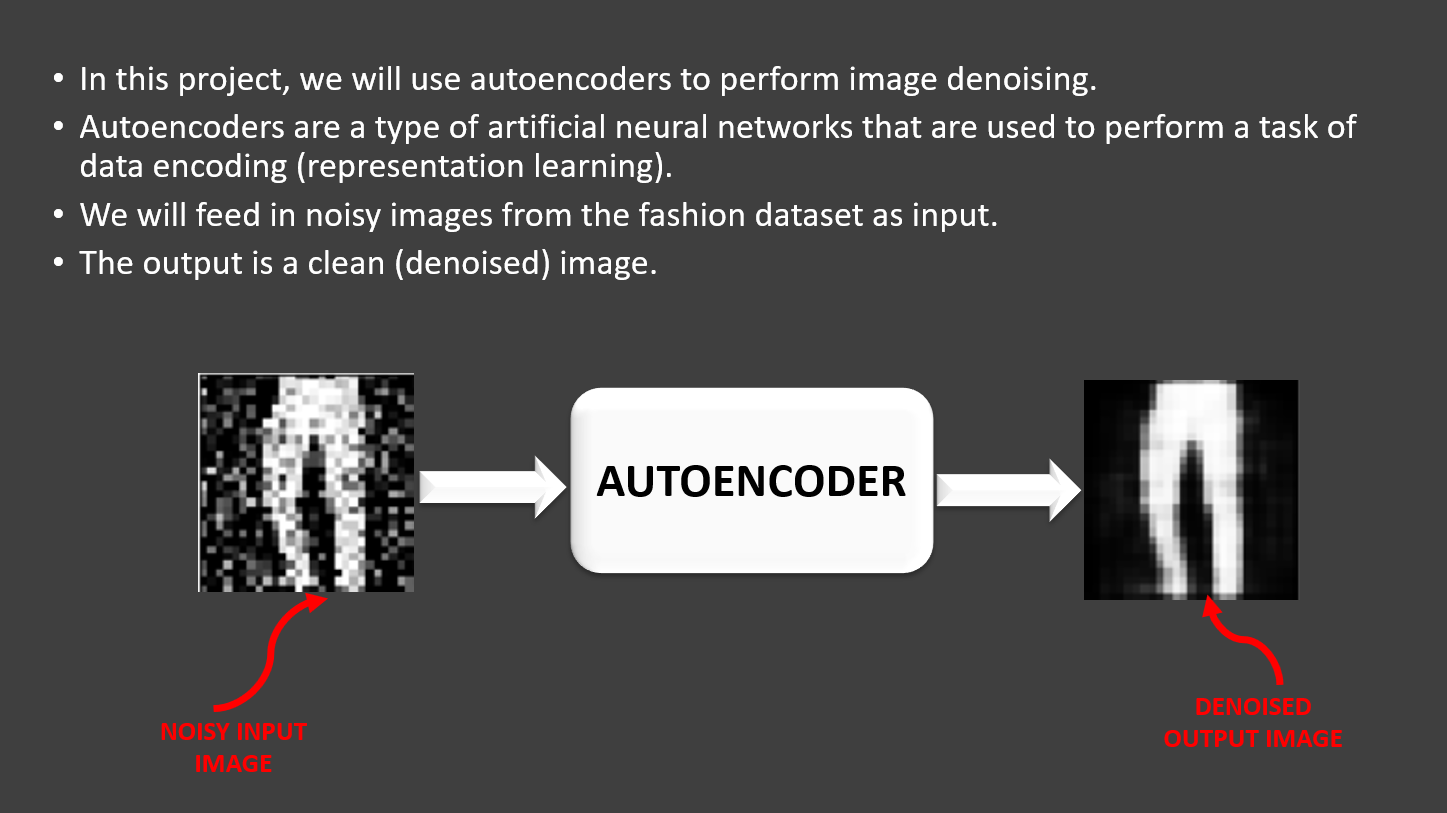

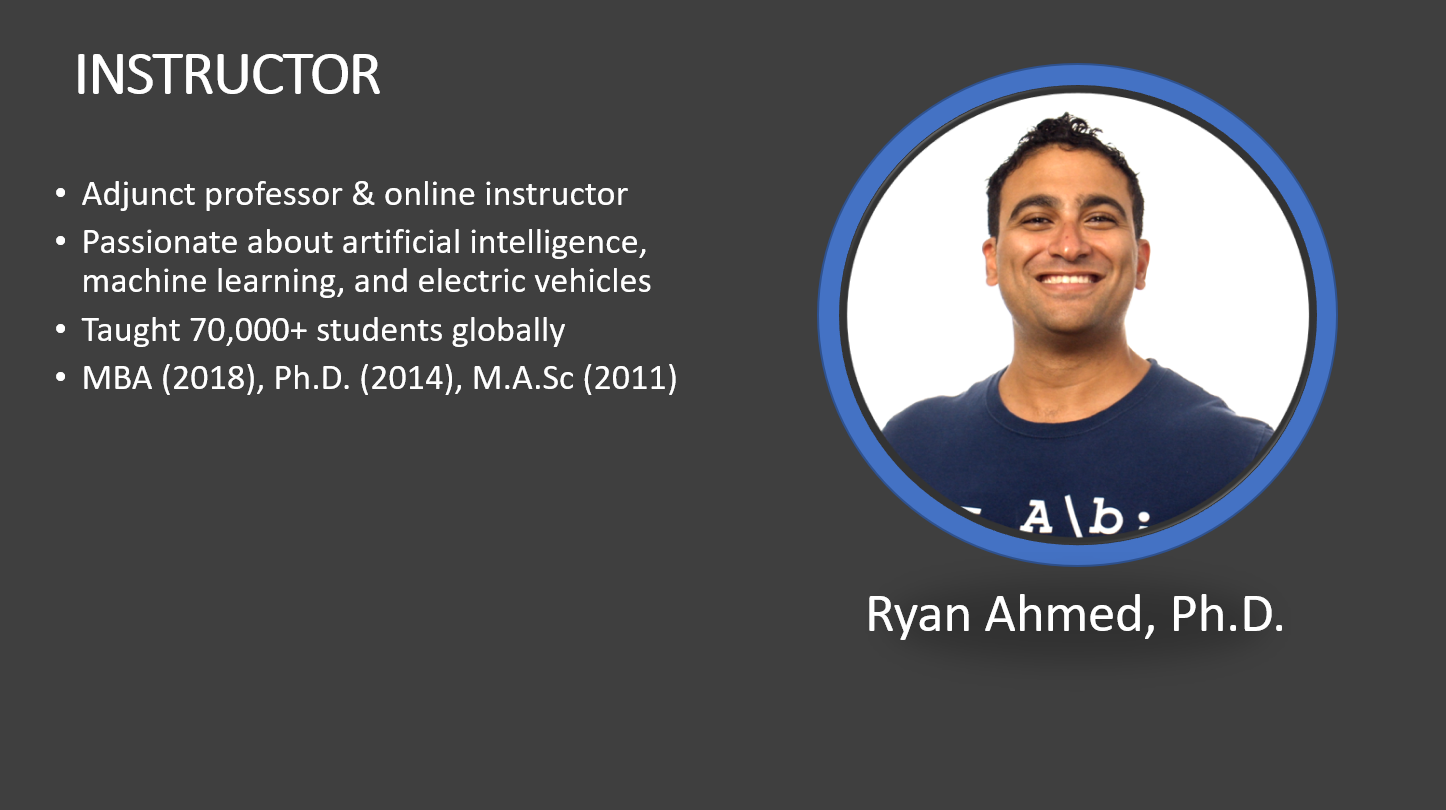

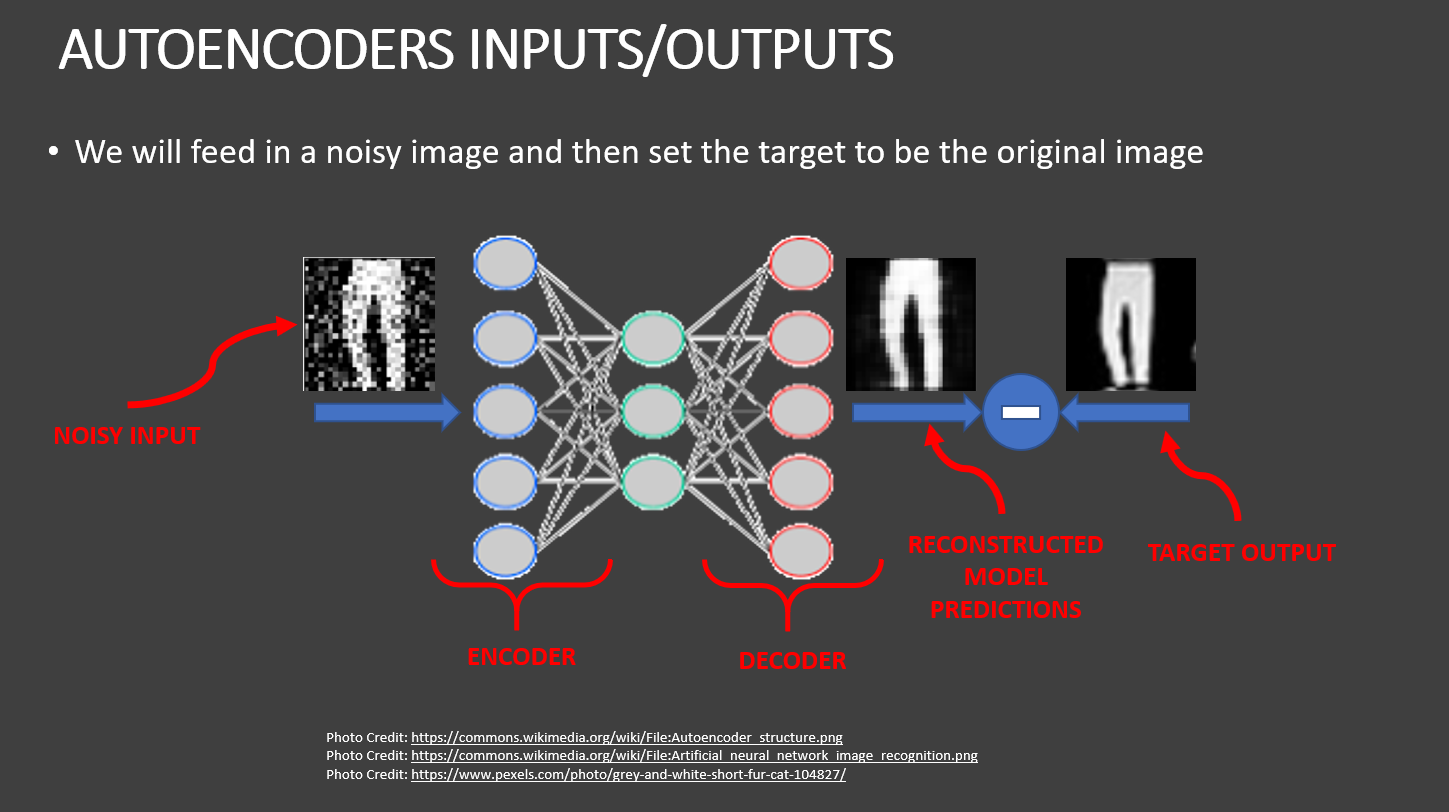

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Load dataset 
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

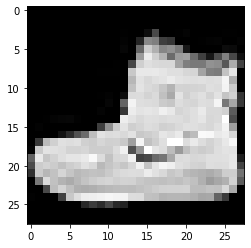

In [5]:
# Visualize a sample image
plt.imshow(X_train[0],cmap='gray')

In [6]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [8]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [9]:
Y_train.shape

(60000,)

In [10]:
Y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

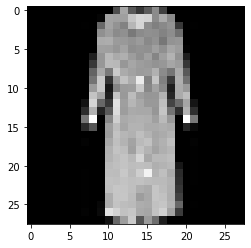

In [14]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(X_train[i],cmap='gray')

In [15]:
label=Y_train[i]
label

4

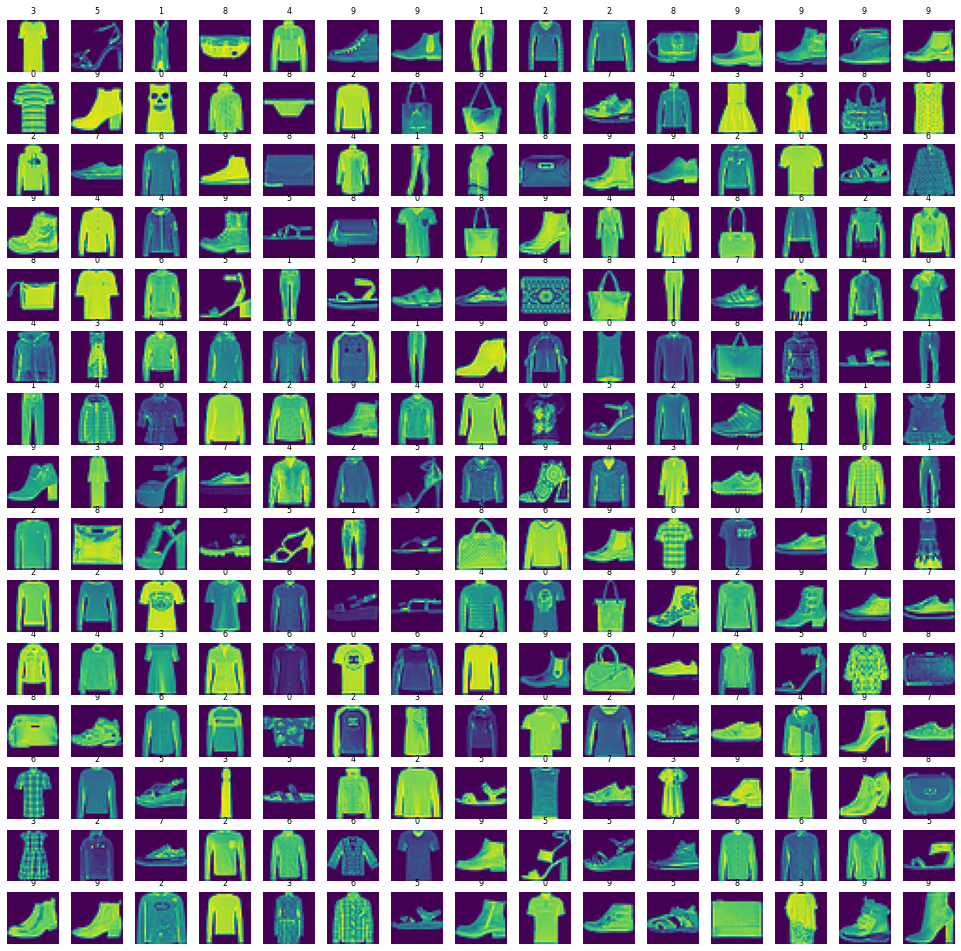

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index],fontsize=8)
    axes[i].axis('off')

# TASK #4: PERFORM DATA PREPROCESSING

In [19]:
# normalize data
X_train=X_train/255
X_test=X_test/255

In [20]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [26]:
# add some noise
noise_factor=0.3

noise_dataset=[]

for img in X_train:
    noisy_image= img+noise_factor*np.random.randn (*img.shape)
    noisy_image=np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

In [38]:
noise_dataset=np.array(noise_dataset)

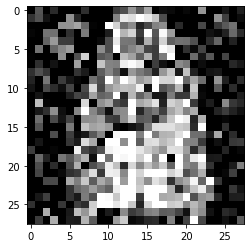

In [27]:
plt.imshow(noise_dataset[22],cmap='gray')

In [31]:
# add noise to testing dataset
noise_factor=0.1

noise_test_dataset=[]

for img in X_test:
    noisy_image= img+noise_factor*np.random.randn (*img.shape)
    noisy_image=np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)

In [39]:
noise_test_dataset=np.array(noise_test_dataset)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

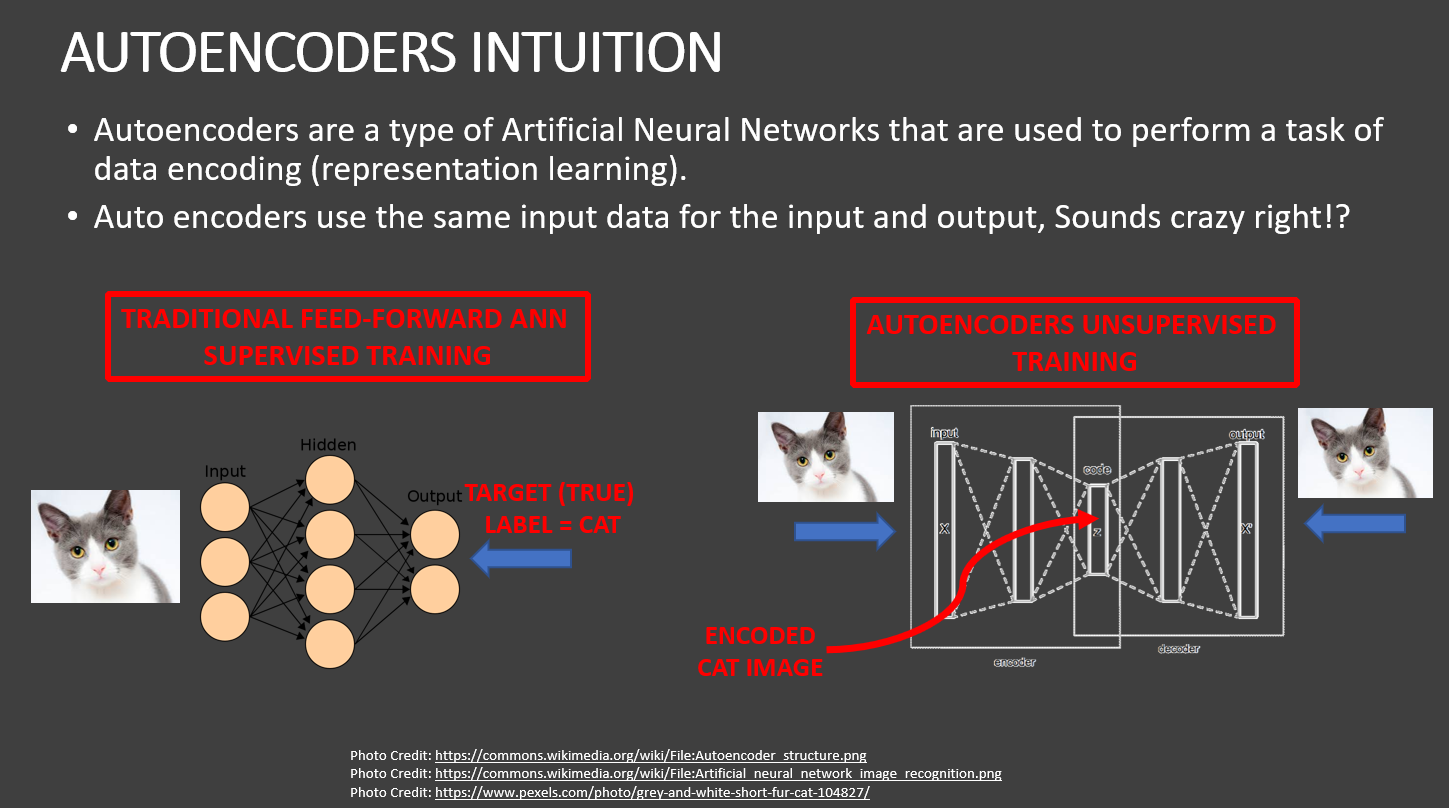

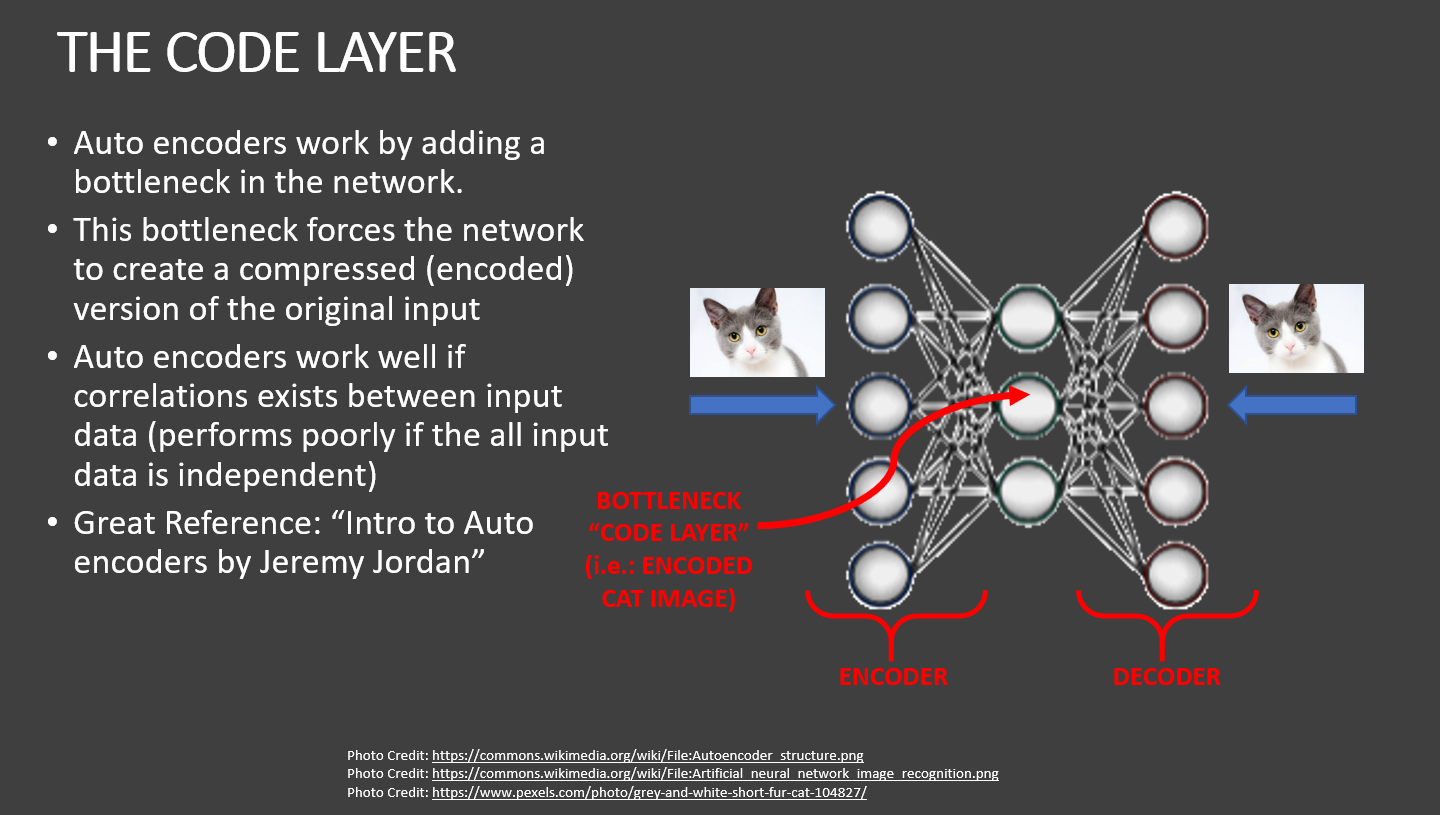

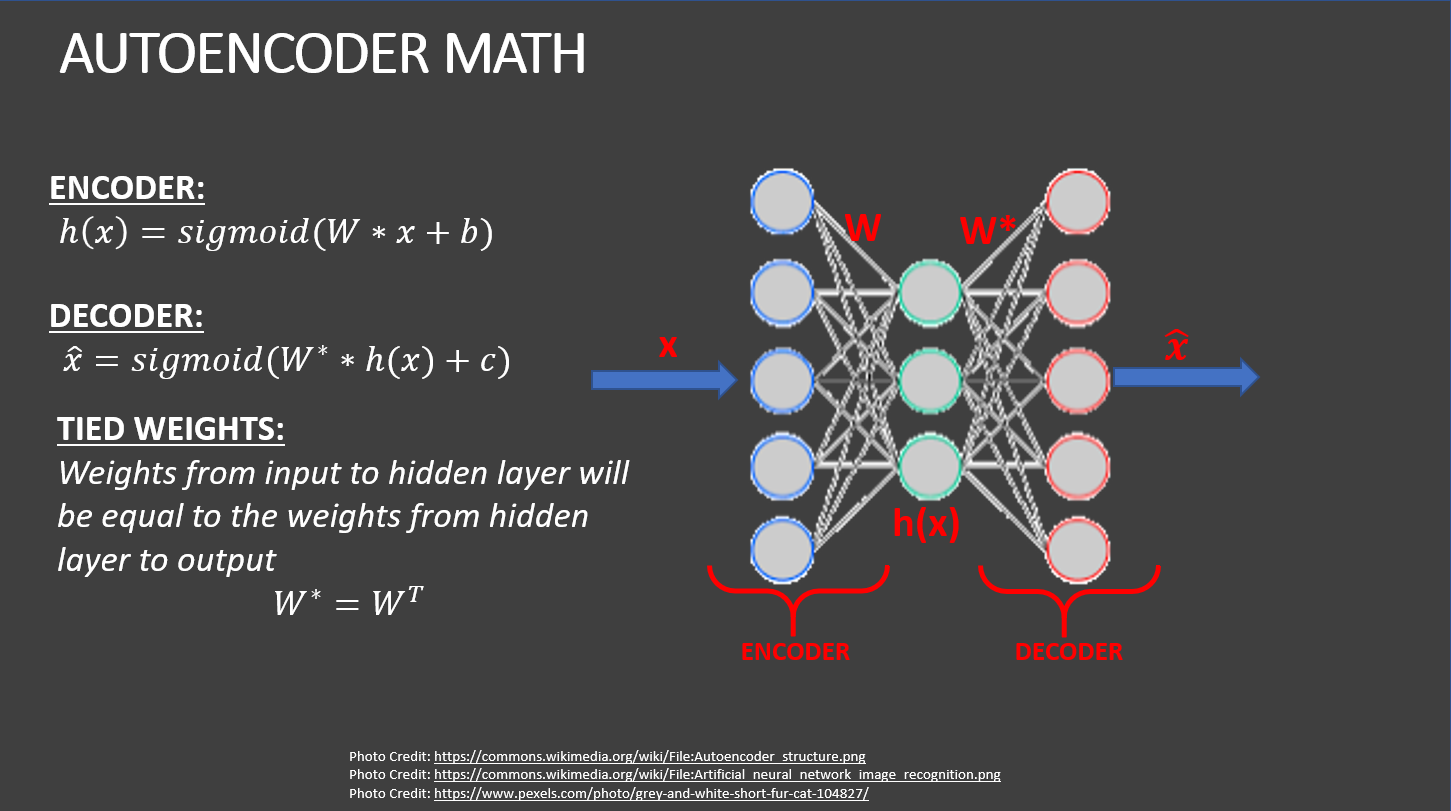

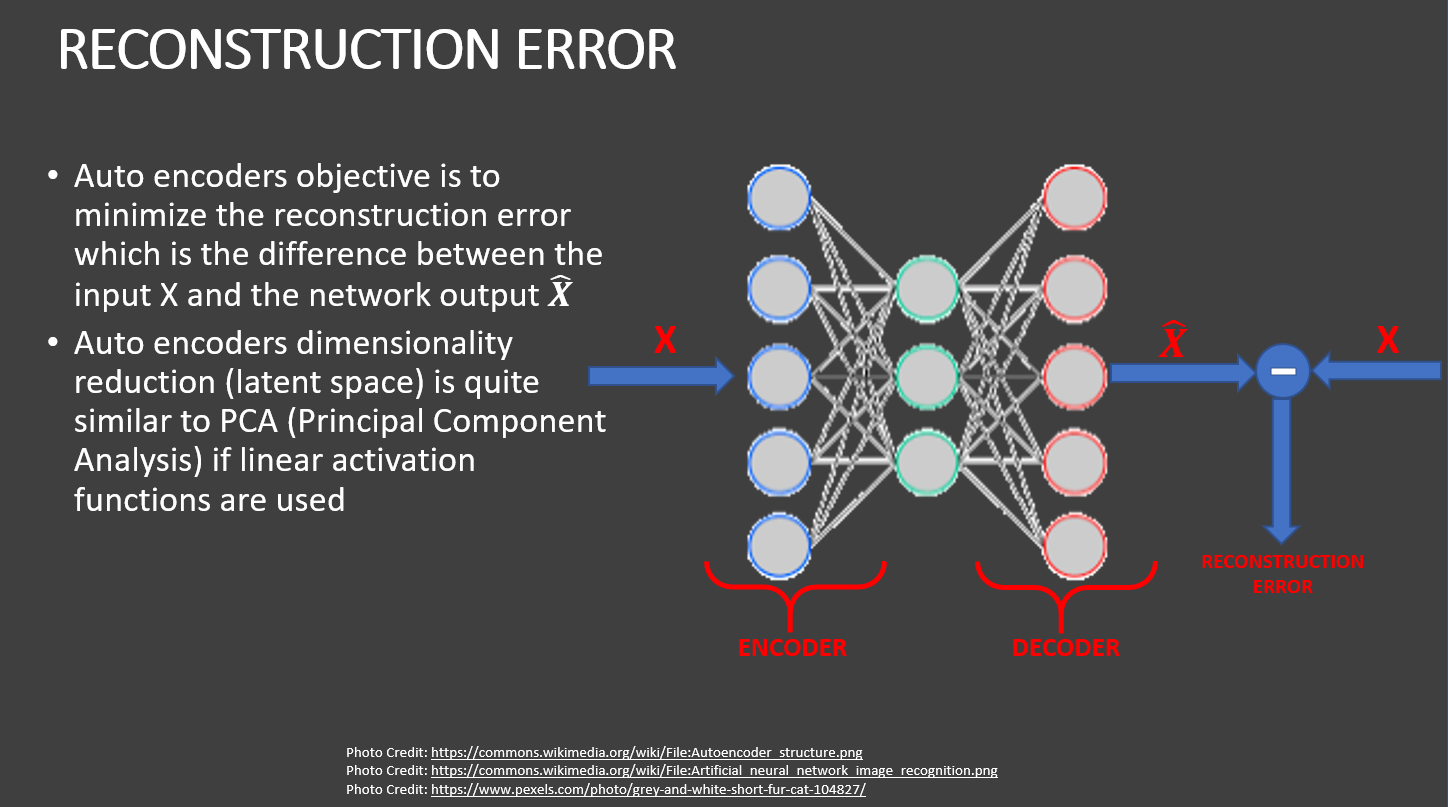

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [35]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=2,padding='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=1,padding='same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='sigmoid',padding='same'))


In [36]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 588us/sample - loss: 0.3973 - val_loss: 0.3149
Epoch 2/10
60000/60000 [==============================] - 30s 494us/sample - loss: 0.3145 - val_loss: 0.3007
Epoch 3/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.3075 - val_loss: 0.2958
Epoch 4/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.3045 - val_loss: 0.2918
Epoch 5/10
60000/60000 [==============================] - 29s 487us/sample - loss: 0.3028 - val_loss: 0.2905
Epoch 6/10
60000/60000 [==============================] - 30s 492us/sample - loss: 0.3018 - val_loss: 0.2889
Epoch 7/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3012 - val_loss: 0.2889
Epoch 8/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.3008 - val_loss: 0.2881
Epoch 9/10
60000/60000 [==============================] - 30s 494us/sample - l

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [41]:
evaluation= autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))
print('Test Accuracy : {:.3f}'.format(evaluation))

10000/10000 [==============================] - 3s 329us/sample - loss: 0.2870
Test Accuracy : 0.287


In [42]:
predict = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))


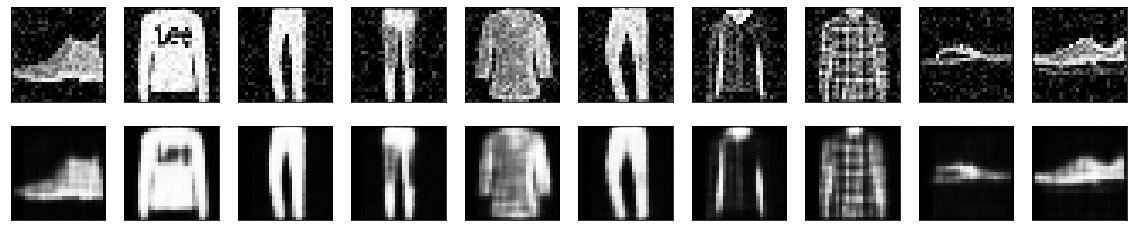

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predict], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot